# Análisis exploratorio para bikes
## Análisis sugeridos:
1.  Distribución de uso por hora (`cnt` vs `hr`)
2. Comparación de uso entre días laborales y fines de semana
3. Influencia del clima (`weathersit`) en la cantidad de bicicletas alquiladas


In [4]:
import pandas as pd
#import matplotlib.pyplot as plt
import plotly.express as px


In [5]:
bikes = pd.read_csv('../dataset/bikes.csv')
bikes.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [6]:
bikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


## Analisis exploratorio (ejemplos)

In [7]:
# Dias por estación

def map_season(season_id):
    seasons={
        1:'Invierno',
        2: 'Primavera',
        3: 'Verano',
        4:'Otoño'
    }
    return seasons.get(season_id,'Desconocido')

metric=(
    bikes
        .groupby('season',as_index=False)
        .agg(n_dias =('cnt','sum'))
        
)
metric['season'] = metric['season'].apply(map_season)

metric.sort_values(by='n_dias',ascending=False)

,season,n_dias
2,Verano,1061129
1,Primavera,918589
3,Otoño,841613
0,Invierno,471348


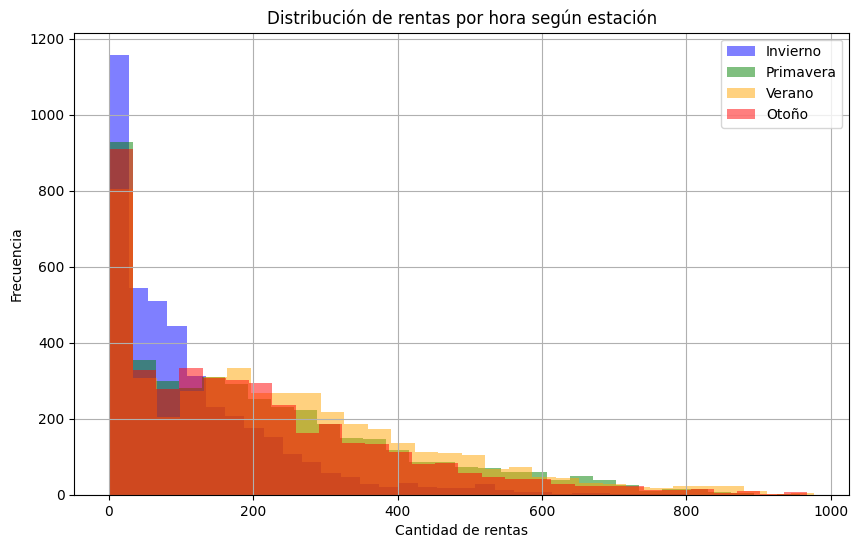

In [ ]:
# Distribución de rentas por estación


plt.figure(figsize=(10, 6))
plt.hist(bikes.query('season == 1')['cnt'], bins=30, alpha=0.5, label='Invierno', color='blue')
plt.hist(bikes.query('season == 2')['cnt'], bins=30, alpha=0.5, label='Primavera', color='green')
plt.hist(bikes.query('season == 3')['cnt'], bins=30, alpha=0.5, label='Verano', color='orange')
plt.hist(bikes.query('season == 4')['cnt'], bins=30, alpha=0.5, label='Otoño', color='red')
plt.legend()
plt.title('Distribución de rentas por hora según estación')
plt.xlabel('Cantidad de rentas')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.show()



In [8]:
# Version plotly


season_labels = {
    1: 'Invierno',
    2: 'Primavera',
    3: 'Verano',
    4: 'Otoño'
}


bikes['season_name'] = bikes['season'].map(season_labels)

# Crear histograma con plotly express
fig = px.histogram(
    bikes,
    x='cnt',
    color='season_name',
    nbins=30,
    barmode='overlay',  # para que se superpongan
    opacity=0.6,         # transparencia para ver la superposición
    labels={'cnt': 'Cantidad de rentas', 'season_name': 'Estación'},
    title='Distribución de rentas por hora según estación'
)

fig.show()


ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

In [ ]:
# Gráfica de barras: total de rentas por estación con plotly express

fig = px.bar(
    metric,
    x='season',
    y='n_dias',
    color='season',
    color_discrete_sequence=['blue', 'green', 'orange', 'red'],
    labels={'season': 'Estación', 'n_dias': 'Total de rentas'},
    title='Total de rentas por estación'
)
fig.update_layout(showlegend=False)
fig.show()

In [9]:
# Gráfica de dispersión: cantidad de rentas vs temperatura

fig = px.scatter(
    bikes,
    x='temp',
    y='cnt',
    color='season_name',
    labels={'temp': 'Temperatura Normalizada', 'cnt': 'Cantidad de rentas', 'season_name': 'Estación'},
    title='Dispersión de cantidad de rentas vs temperatura por estación',
    opacity=0.7
)
fig.show()

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed